In [18]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [19]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber: int

In [20]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def multiplier(state: AgentState) -> AgentState:
    """This node multiplies the 2 numbers"""
    
    state["finalNumber"] = state["number1"] * state["number2"]
    return state

def divider(state: AgentState) -> AgentState:
    """This node divides the 2 numbers"""
    
    state["finalNumber"] = state["number1"] / state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node decides which node to execute next"""
    
    if state["operation"] == "add":
        return "addition_operation"
    elif state["operation"] == "subtract":
        return "subtraction_operation"
    elif state["operation"] == "multiply":
        return "multiplication_operation"
    elif state["operation"] == "divide":
        return "division_operation"

In [21]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("multiplier", multiplier)
graph.add_node("divider", divider)
graph.add_node("router", lambda state: state) # passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router", 
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "adder",
        "subtraction_operation": "subtractor",
        "multiplication_operation": "multiplier",
        "division_operation": "divider"
    })
graph.add_edge("adder", END)
graph.add_edge("subtractor", END)
graph.add_edge("multiplier", END)
graph.add_edge("divider", END)

app = graph.compile()


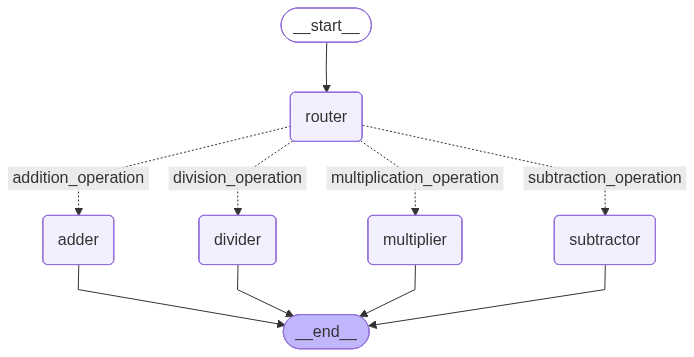

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
result = app.invoke({"number1": 2, "number2": 3, "operation": "add"})

In [24]:
print(result)

{'number1': 2, 'number2': 3, 'operation': 'add', 'finalNumber': 5}


In [25]:
print(result["finalNumber"])

5
